In [1]:
import numpy as np
from collections import Counter
import random
import csv
import time
import matplotlib.pyplot as plt
from hw_tree import Tree, RandomForest, hw_tree_full, hw_randomforests
import seaborn as sns

sns.set_theme()

def tki():
    #load from csv
    # df = np.loadtxt('hw1/tki-resistance.csv', delimiter=',')
    with open('tki-resistance.csv', 'r') as file:
        reader = csv.reader(file)
        legend = next(reader)
        df = list(reader)
        df = np.array(df)
    # print(df)
    learn= df[0:129, :]
    test = df[130:, :]
    learn_X = np.array(learn[:, :-1], dtype=float)

    _, learn_y = np.unique(learn[:, -1], return_inverse=True)
    test_X = np.array(test[:, :-1], dtype=float)
    _, test_y = np.unique(test[:, -1], return_inverse=True)

    return (learn_X, learn_y), (test_X, test_y), np.array(legend)[:-1]

In [2]:
learn, test, legend = tki()

In [3]:

ns = [10, 20, 50, 100, 200, 300, 400, 500]

missclassification = []
std_error = []
for n in ns:
    ms = hw_randomforests(learn, test, n=n,rand=random.Random(0))[1]
    missclassification.append(ms[0])
    std_error.append(ms[1])


In [9]:
print(missclassification)

[0.1724137931034483, 0.06896551724137931, 0.05172413793103448, 0.05172413793103448, 0.034482758620689655, 0.017241379310344827, 0.017241379310344827, 0.017241379310344827]


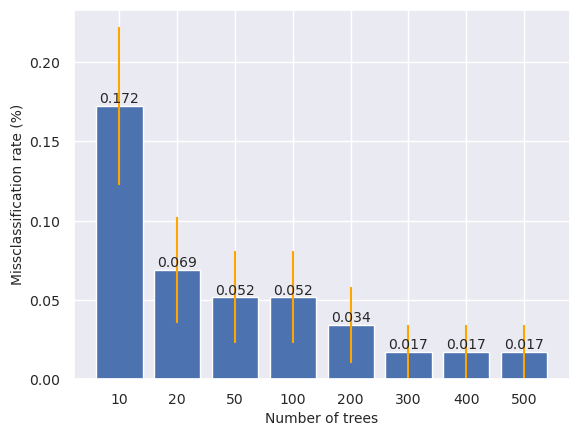

In [62]:
ns = [str(n) for n in ns ]
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.bar(ns, missclassification)
plt.errorbar(ns, missclassification, yerr=std_error, color='orange', ls='none')
for i in range(len(ns)):
    plt.text(i, missclassification[i], f'{missclassification[i]:.3f}', ha='center', va='bottom', size=10)

plt.xlabel('Number of trees', size = 10)
plt.ylabel('Missclassification rate (%)', size=10)

plt.savefig('missclassification.pdf')

In [14]:
rf = RandomForest(n=100, rand=random.Random(0))
p = rf.build(learn[0], learn[1])
importance = p.importance()

In [22]:
legend = [ str(l).strip() for l in legend]

In [58]:
top10_idx = np.argsort(importance)[-10:]
top10 = [legend[i].split('.')[0] for i in top10_idx]
top10_importance = [importance[i] for i in top10_idx]

top10.reverse()
top10_importance.reverse()
top10_importance = [l* 100 for l in top10_importance]

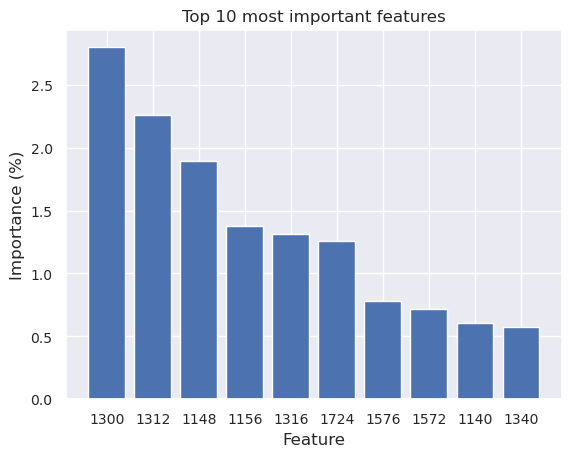

In [61]:

plt.bar(top10, top10_importance)
plt.title('Top 10 most important features')
plt.xlabel('Feature')
plt.ylabel('Importance (%)')
plt.savefig('importance.pdf')